# Week 6. Stochastic gradient descent model

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Stochastic gradient descent

In [6]:
def derivative(x, y):  # derivative of objective function
    return asarray([x * 2.0, y * 2.0])

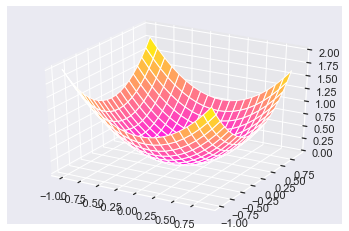

In [7]:
from numpy import arange
from numpy import meshgrid
 
def objective(x, y):  # objective function
    return x**2.0 + y**2.0
 
r_min, r_max = -1.0, 1.0 # define range for input
xaxis = arange(r_min, r_max, 0.1); yaxis = arange(r_min, r_max, 0.1) # sample input range uniformly at 0.1 increments
x, y = meshgrid(xaxis, yaxis) # create a mesh from the axis
results = objective(x, y) # compute targets
figure = plt.figure() # create a surface plot with the jet color scheme
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='spring'); plt.show()

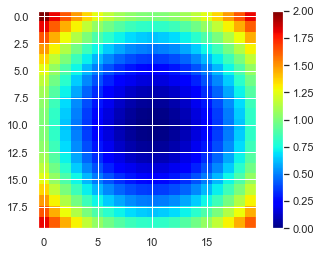

In [110]:
plt.imshow(results, cmap='jet'); plt.colorbar()

In [9]:
import pandas as pd
data = pd.DataFrame({'x': [1,2,4,3,5], 'y':[1,3,3,2,5]})
data

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


max_iter을 5, 10, 15, 20으로 fitting 

In [17]:
data['x'].values.reshape(-1,1).shape

(5, 1)

In [24]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=8)                  # 1. 모델 객체화 (max_iter --> aka epochs)
model.fit(data['x'].values.reshape(-1,1), data['y'])                                      # 2. 학습하기

model                  #  학습한 모델 내부 저장

SGDRegressor(max_iter=8)

SGDRegressor(max_iter=8)

In [25]:
model.predict(data['x'].values.reshape(-1,1))

array([0.99918424, 1.7828062 , 3.35005014, 2.56642817, 4.1336721 ])

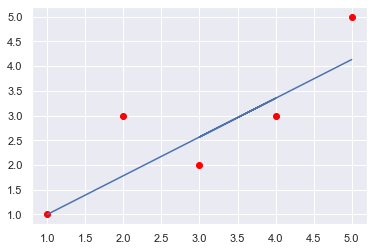

In [26]:
y_pred = model.predict(data['x'].values.reshape(-1,1)) #  
plt.scatter(data['x'], data['y'], color='red')
plt.plot(data['x'], y_pred)

## 알고리즘 (fit, predict) 비교
#### 데이터 불러오기

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [28]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.feature_names.extend(housing.target_names)
df = pd.DataFrame(np.c_[housing.data, housing.target], columns = housing.feature_names)
#df=df.sample(frac=0.1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
df.corr()[-1:]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.02465,-0.023737,-0.14416,-0.045967,1.0


In [30]:
X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']

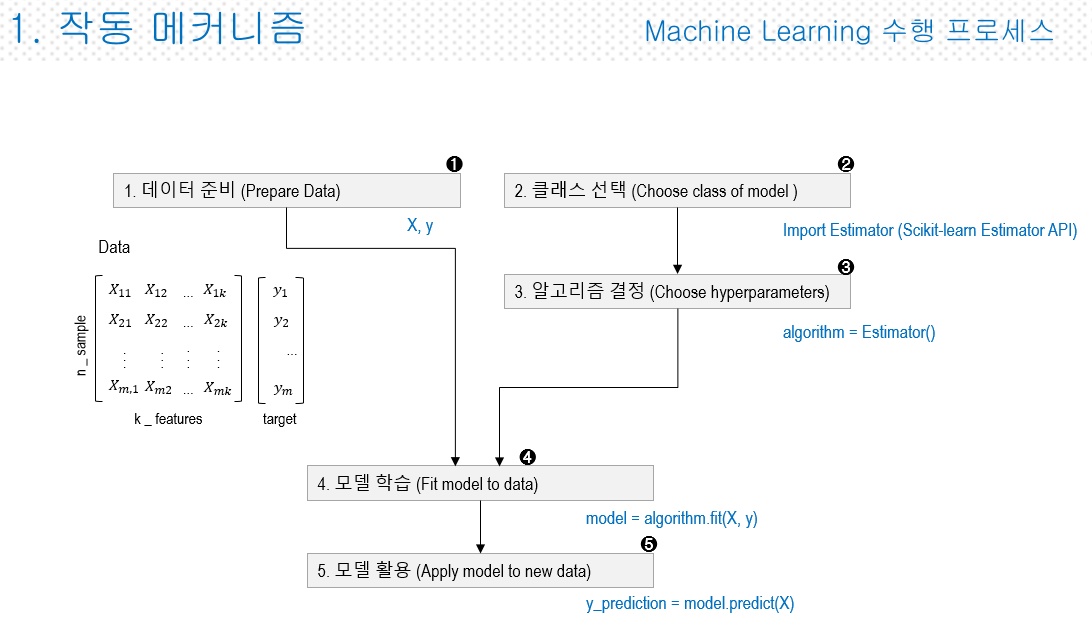

In [2]:
from IPython.display import Image
width=1000; height=600
Image(filename='../image/2021-04-08_18-48-29.png', width=width, height=height)

## 3. Stochastic gradient descent

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
from sklearn.linear_model import SGDRegressor       # 알고리즘 불러오고 데이터 준비하기
model = SGDRegressor(max_iter=500)                  # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
model.get_params()                                                #  학습한 모델 내부 저장

SGDRegressor(max_iter=500)

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 500,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [34]:
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
print(f'모델의 Mean squared error는 :{mean_squared_error(y, y_pred).round(4)}')

model.coef_
model.intercept_

모델의 Mean squared error는 :0.7107


array([ 0.44136552, -0.05911531])

array([0.55823039])

<Figure size 576x432 with 0 Axes>

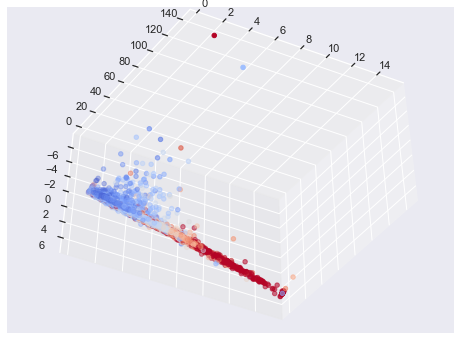

In [38]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X['MedInc'], X['AveRooms'], y_pred, c=y, cmap='coolwarm')
ax.view_init(130)  # 그림의 각도 250도

## 2. Regression (scikit learn API)

In [39]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False) # #print('Intercept: \n', reg.intercept_)

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

LinearRegression(fit_intercept=False)

Coefficients: 
 [0.49376576 0.01487299]
Mean squared error: 0.74
Coefficient of determination: 0.45


## 1. Ordinary Least Squares (statisitc models API)

In [40]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          6.805e+04
Date:                Thu, 08 Apr 2021   Prob (F-statistic):                        0.00
Time:                        19:29:43   Log-Likelihood:                         -26162.
No. Observations:               20640   AIC:                                  5.233e+04
Df Residuals:                   20638   BIC:                                  5.234e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 중간고사 문제

In [41]:
df = pd.DataFrame(np.c_[housing.data, housing.target], columns = housing.feature_names)
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


### StandardScaler

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:,:-1])
df.iloc[:,:-1] = scaler.transform(df.iloc[:,:-1]) 

StandardScaler()

### Minmax

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.iloc[:,:-1])
df.iloc[:,:-1] = scaler.transform(df.iloc[:,:-1])

MinMaxScaler()

### Robust

In [44]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df.iloc[:,:-1])
df.iloc[:,:-1] = scaler.transform(df.iloc[:,:-1])

RobustScaler()

### Stochastic gradient descent

In [45]:
X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']

In [46]:
from sklearn.linear_model import SGDRegressor       # 알고리즘 불러오고 데이터 준비하기
model = SGDRegressor(max_iter=500)                  # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
print(f'모델의 Mean squared error는 :{mean_squared_error(y, y_pred).round(4)}')

model.coef_
model.intercept_

SGDRegressor(max_iter=500)

모델의 Mean squared error는 :0.6985


array([ 0.97864576, -0.1088679 ])

array([1.95376224])

## 자료 표준화의 중요성

### 데이터 불러오기

In [47]:
from sklearn.datasets import load_digits
data = load_digits()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target
X.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


### 표준화없이 분류(classification)

In [48]:
np.random.seed(123)
from sklearn.linear_model import SGDClassifier      
model = SGDClassifier()                              # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)

SGDClassifier()

In [50]:
y
y_pred

array([0, 1, 2, ..., 8, 9, 8])

array([0, 1, 2, ..., 8, 9, 8])

In [55]:
(y == y_pred).sum()/len(y)

0.9788536449638287

### 표준화이후 분류(classification)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

StandardScaler()

In [58]:
np.random.seed(123)
from sklearn.linear_model import SGDClassifier      
model = SGDClassifier()                              # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X_scaled, y)                                      #  2. 학습하기
y_pred = model.predict(X_scaled)                            # 3. 예측하기 (unseen data)

SGDClassifier()

In [59]:
(y == y_pred).sum()/len(y)

0.9816360601001669

## 참고 1) 타이타닉 자료에 표준화 전후 예측 결과 비교

In [98]:
df = pd.read_csv('../data/train.csv')
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.dropna(inplace=True)

In [99]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [101]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         6
Parch         7
Fare        219
Embarked      3
dtype: int64

In [102]:
df.columns[df.dtypes=='object']

Index(['Sex', 'Embarked'], dtype='object')

## Method of correlation:
* pearson (default)
* kendall
* spearman

## <font color='red'> Syntax: pandas.get_dummies()
pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [103]:
data = pd.get_dummies(df[['Sex', 'Embarked']])
data.corr()
data.corr(method='pearson')

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Sex_female,1.000000,-1.000000,0.103611,0.027256,-0.109078
Sex_male,-1.000000,1.000000,-0.103611,-0.027256,0.109078
Embarked_C,0.103611,-0.103611,1.000000,-0.095623,-0.884986
Embarked_Q,0.027256,-0.027256,-0.095623,1.000000,-0.378859
Embarked_S,-0.109078,0.109078,-0.884986,-0.378859,1.000000


,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Sex_female,1.000000,-1.000000,0.103611,0.027256,-0.109078
Sex_male,-1.000000,1.000000,-0.103611,-0.027256,0.109078
Embarked_C,0.103611,-0.103611,1.000000,-0.095623,-0.884986
Embarked_Q,0.027256,-0.027256,-0.095623,1.000000,-0.378859
Embarked_S,-0.109078,0.109078,-0.884986,-0.378859,1.000000


In [104]:
data

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
885,1,0,0,1,0
886,0,1,0,0,1
887,1,0,0,0,1
889,0,1,1,0,0


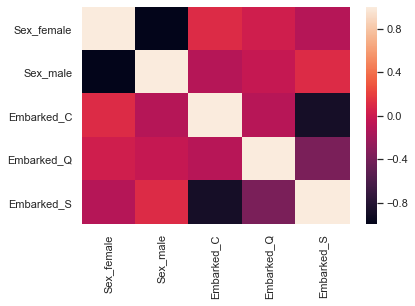

In [75]:
import seaborn as sns
sns.heatmap(data.corr())

In [77]:
data = pd.get_dummies(df[['Sex', 'Embarked']], drop_first=True)
data.corr()
data.corr(method='pearson')

,Sex_male,Embarked_Q,Embarked_S
Sex_male,1.000000,-0.027256,0.109078
Embarked_Q,-0.027256,1.000000,-0.378859
Embarked_S,0.109078,-0.378859,1.000000


,Sex_male,Embarked_Q,Embarked_S
Sex_male,1.000000,-0.027256,0.109078
Embarked_Q,-0.027256,1.000000,-0.378859
Embarked_S,0.109078,-0.378859,1.000000


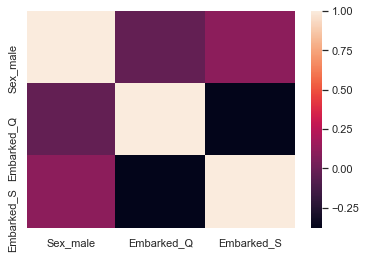

In [78]:
sns.heatmap(data.corr())

In [69]:
X = pd.get_dummies(df.drop(['Survived'], axis=1), prefix= df.columns[df.dtypes=='object'], drop_first=True)
y = df['Survived']
X.head()
y[0:5]

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### (1) 표준화 없이 예측

In [79]:
np.random.seed(123)
from sklearn.linear_model import SGDClassifier      
model = SGDClassifier()                              # 1. 알고리즘 객체화 (max_iter --> aka epochs)

model.fit(X, y)                                      #  2. 학습하기
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)

(y == y_pred).sum()/len(y)

SGDClassifier()

0.7289325842696629

### (2) 표준화후 예측

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

StandardScaler()

In [81]:
np.random.seed(123)
model.fit(X_scaled, y)                                      #  2. 학습하기
y_pred = model.predict(X_scaled)                            # 3. 예측하기 (unseen data)

SGDClassifier()

In [82]:
(y == y_pred).sum()/len(y)

0.7654494382022472

### (3) 더미변수 제외하고 표준화후 예측

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X.iloc[:, 0:5])
X.iloc[:, 0:5] = scaler.transform(X.iloc[:, 0:5]) 

StandardScaler()

In [84]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.908600,-0.527669,0.522511,-0.506787,-0.516380,1,0,1
1,-1.482983,0.577094,0.522511,-0.506787,0.694046,0,0,0
2,0.908600,-0.251478,-0.552714,-0.506787,-0.503620,0,0,1
3,-1.482983,0.369951,0.522511,-0.506787,0.350326,0,0,1
4,0.908600,0.369951,-0.552714,-0.506787,-0.501257,1,0,1


In [85]:
np.random.seed(123)
model.fit(X, y)                                      #  2. 학습하기
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)

SGDClassifier()

In [86]:
(y == y_pred).sum()/len(y)

0.726123595505618

### (4) 인디안 당뇨병 자료

In [92]:
df= pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [94]:
np.random.seed(123)
model.fit(X, y)                                      #  2. 학습하기
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
(y == y_pred).sum()/len(y)

SGDClassifier()

0.421875

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) 

StandardScaler()

In [96]:
np.random.seed(123)
model.fit(X, y)                                      #  2. 학습하기
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
(y == y_pred).sum()/len(y)

SGDClassifier()

0.6640625

## 참고 2) 데이터의 특성에 따라 예측을 잘하는 알고리즘이 있음

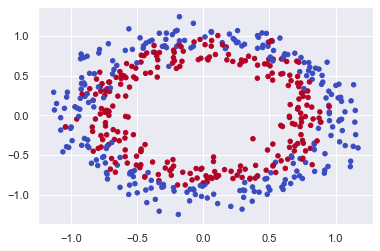

In [19]:
from sklearn.datasets import make_blobs, make_circles, make_moons
#X, y = make_blobs(n_samples=5000, centers=2, random_state=0, cluster_std=0.60)
#X, y = make_moons(n_samples=500, noise=0.1)
X, y = make_circles(n_samples=500, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');

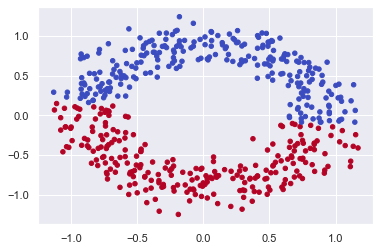

In [20]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000)                  # 1. 모델 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      # 2. 학습하기 
y_pred = model.predict(X) # 
y_pred
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='coolwarm');

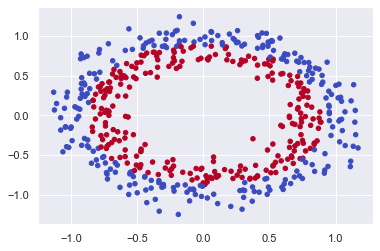

In [21]:
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X, y)
y_pred = model.predict(X) # 
y_pred
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='coolwarm');

## End